In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from pathlib import Path
import xarray as xr
import easygems.healpix as egh
import pandas as pd

In [2]:
# Define the path to the Zarr dataset
# Open the Zarr store using xarray

zoom_levels = [3,4,5,6,7,8,9,10]
temp_res = 1

zoom = 3; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_3 = xr.open_zarr(path)

zoom = 4; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_4 = xr.open_zarr(path)

zoom = 5; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_5 = xr.open_zarr(path)

zoom = 6; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_6 = xr.open_zarr(path)

zoom = 7; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_7 = xr.open_zarr(path)

zoom = 8; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_8 = xr.open_zarr(path)

zoom = 9; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_9 = xr.open_zarr(path)

zoom = 10; path = '/g/data/qx55/uk_node/glm.n2560_RAL3p3/data.healpix.PT%iH.z%i.zarr' % (temp_res, zoom)
ds_10 = xr.open_zarr(path)


ds_dict = {3:ds_3.pr, 4:ds_4.pr, 5:ds_5.pr, 6:ds_6.pr, 7:ds_7.pr, 8:ds_8.pr, 9:ds_9.pr, 10:ds_10.pr}


In [3]:
# Get domain for Sydney

# Read in weather station data
ws = pd.read_excel('hk25-AusNode-ExtremePrecipitation/Syd_station_info.xlsx')

# Create lat / lon arrays
lon = ws['Longitude']
lat = ws['Latitude']
ws_names = ws['Station_name']

# Get boundary of points
margin = 0.1
lon_min = min(lon)-margin
lon_max = max(lon)+margin
lat_min = min(lat)-margin
lat_max = max(lat)+margin
bounds = [lon_min, lon_max, lat_min, lat_max]
print(bounds)
print(ws_names)



# Manually add bounds
lon_min = 149
lon_max = 152
lat_min = -34.8
lat_max = -33

[150.62810000000002, 151.6766, -34.0465, -33.1814]
0           NORAH HEAD AWS
1            RICHMOND RAAF
2       BADGERYS CREEK AWS
3       SYDNEY AIRPORT AMO
4    BANKSTOWN AIRPORT AWS
Name: Station_name, dtype: object


In [4]:
import imageio
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [5]:
# Subset to our time range of interest
start_date = "2020-03-01"
finish_date = "2021-02-28"

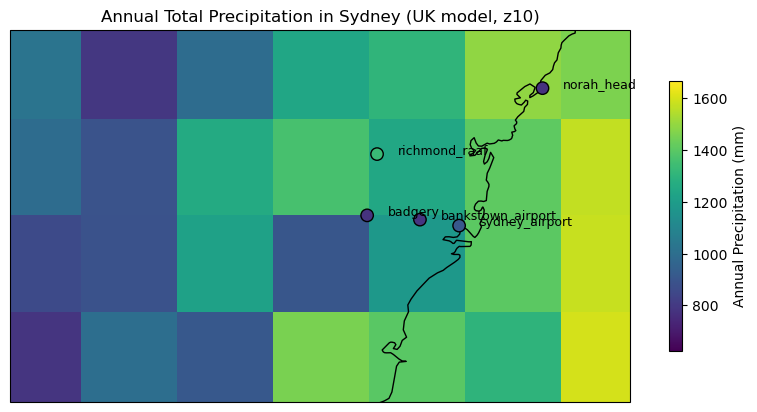

In [6]:
# Get the total annual precipitation spatial map
pr_10 = ds_10.pr * 60*60 # kg m-2 s-1 to mm / hr, not subsetted
time_10_global = pr_10.sel(time=slice(start_date, finish_date))
annual_total = time_10_global.sum(dim='time')


# Define the min and max values for the colorbar
vmin = 15000 / 24
vmax = 40000 / 24

# Start a new figure with Cartopy projection
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': projection})

# Plot the scatter on top of the basemap
ax.set_global()
im = egh.healpix_show(annual_total.values, ax=ax, vmin=vmin, vmax=vmax)
ax.coastlines()

ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.7)
cbar.set_label("Annual Precipitation (mm)")


# Sydney rainfall data
locations = ['norah_head', 'richmond_raaf', 'badgery', 'sydney_airport', 'bankstown_airport']
lats = lat
lons = lon
rainfall = [773.4, 1330.0, 776.4, 905.8, 785.4]



# Plot the points
scatter = ax.scatter(
    lons,
    lats,
    c=rainfall,
    cmap=im.get_cmap(),
    vmin=vmin,
    vmax=vmax,
    s=80,
    edgecolor='black',
    transform=ccrs.PlateCarree(),
    zorder=10
)

for loc, lon, lat in zip(locations, lons, lats):
    ax.text(lon + 0.1, lat, loc, transform=ccrs.PlateCarree(), fontsize=9, zorder=11)



plt.title("Annual Total Precipitation in Sydney (UK model, z10)")
fname = f"hk25-AusNode-ExtremePrecipitation/Plots/Sydney_annual_precip_z10.png"
plt.savefig(fname, dpi=150, bbox_inches='tight')
plt.show()